In [1]:
from trading_ig import IGService
from autoIG.config import ig_service_config,open_position_config_,close_position_config_
ig_service = IGService(**ig_service_config)
from autoIG.instruments import Epics
from autoIG.utils import mins_to_ms
from datetime import date
import pandas as pd
from autoIG.utils import TMP_DIR
create_session_responce = ig_service.create_session()


In [17]:
transactions = ig_service.fetch_transaction_history_by_type_and_period(
    trans_type='ALL_DEAL',
    milliseconds=mins_to_ms(60)
    )
activity = ig_service.fetch_account_activity(
    from_date=date(2022,12,28),
    to_date=date(2023,1,1),
    detailed=True,
    )

In [46]:
activity_filtered = activity[activity.direction=='SELL'][['date','epic','dealId','affectedDealId']]
activity_filtered = activity_filtered.rename(columns = {'dealId':'closing_dealId','affectedDealId':'opening_dealId','date':'sell_date'})
activity_filtered.sell_date = pd.to_datetime(activity_filtered.sell_date)


In [47]:
activity_filtered

,sell_date,epic,closing_dealId,opening_dealId
0,2022-12-30 09:16:02,CC.D.CL.USS.IP,DIAAAALG2EJ4MAV,DIAAAALG2EDAUAW
2,2022-12-30 09:15:00,CC.D.CL.USS.IP,DIAAAALG2EMAKBA,DIAAAALG2EC8KAW
4,2022-12-30 09:14:00,CC.D.CL.USS.IP,DIAAAALG2EDDWAW,DIAAAALG2CT88BB
6,2022-12-30 09:13:00,CC.D.CL.USS.IP,DIAAAALG2D346AZ,DIAAAALG2DZQRAU
8,2022-12-30 09:12:00,CC.D.CL.USS.IP,DIAAAALG2DM9YBD,DIAAAALG2DEFDAV
10,2022-12-30 09:11:00,CC.D.CL.USS.IP,DIAAAALG2EAEMA8,DIAAAALG2C4XMAS
12,2022-12-30 09:10:00,CC.D.CL.USS.IP,DIAAAALG2C42XAS,DIAAAALG2DQTHBC
14,2022-12-30 09:09:00,CC.D.CL.USS.IP,DIAAAALG2DWRBAJ,DIAAAALG2DPH9A6
16,2022-12-30 09:08:01,CC.D.CL.USS.IP,DIAAAALG2DEEMAV,DIAAAALG2DLVYA9
18,2022-12-30 09:07:00,CC.D.CL.USS.IP,DIAAAALG2DTBEAL,DIAAAALG2C8UTAU


In [48]:
transactions_filtered = transactions.drop(['date','period','transactionType','cashTransaction'],axis=1)
transactions_filtered=  transactions_filtered.rename(columns = {'reference':'closing_dealId'}).astype({'openLevel':float,'closeLevel':float})
transactions_filtered

,instrumentName,profitAndLoss,closing_dealId,openLevel,closeLevel,size,currency
0,Oil - US Crude,£0.60,DIAAAALG2EJ4MAV,7867.9,7868.5,+1,£
1,Oil - US Crude,£-4.80,DIAAAALG2EMAKBA,7872.9,7868.1,+1,£
2,Oil - US Crude,£-2.80,DIAAAALG2EDDWAW,7873.9,7871.1,+1,£
3,Oil - US Crude,£-11.20,DIAAAALG2D346AZ,7876.3,7865.1,+1,£
4,Oil - US Crude,£-9.20,DIAAAALG2DM9YBD,7878.3,7869.1,+1,£
5,Oil - US Crude,£1.80,DIAAAALG2EAEMA8,7868.3,7870.1,+1,£
6,Oil - US Crude,£-1.80,DIAAAALG2C42XAS,7874.3,7872.5,+1,£
7,Oil - US Crude,£4.60,DIAAAALG2DWRBAJ,7869.9,7874.5,+1,£
8,Oil - US Crude,£-2.10,DIAAAALG2DEEMAV,7866.6,7864.5,+1,£
9,Oil - US Crude,£-3.80,DIAAAALG2DTBEAL,7874.3,7870.5,+1,£


In [49]:
position_metrics=  pd.read_csv(TMP_DIR/'position_metrics.csv')
position_metrics = position_metrics.rename(columns = {'dealId':'opening_dealId'})
position_metrics

,dealreference,opening_dealId,prediction,model_used,buy_date
0,6QPSALJJJMATYQR,DIAAAALGJ9Y6SAG,1.000177,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-28 21:44:00.589
1,8UDSUYYBPHNTYQR,DIAAAALGKCGR6AY,1.000125,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-28 21:45:05.584
2,GPU75T9SJ4ETYQR,DIAAAALGKBR5RAN,1.000177,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-28 21:56:53.490
3,GM2ZEGR5QZETYQR,DIAAAALGKAQMLBB,1.000177,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-28 22:10:01.219
4,9KGBFXBMAGJTYQR,DIAAAALGKCNG3AQ,1.000177,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-28 22:13:23.239
5,4BPUYVB4TE6TYQR,DIAAAALGKBEFQAG,1.000173,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-28 22:14:05.269
6,VD4J3J2SKFSTYQR,DIAAAALGUVCLQAT,1.000177,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-29 20:59:00.470
7,UQWS8FMTWDATYQR,DIAAAALGUT7GQAH,1.000136,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-29 21:00:00.437
8,6S3VNJZZ5RJTYQR,DIAAAALGUUQEHAN,1.000180,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-29 21:01:00.438
9,V96U6AVZ732TYQR,DIAAAALGUTM4HA9,1.000168,/Users/ezracitron/my_projects/auto_IG/mlruns/9...,2022-12-29 21:02:00.541


In [60]:
joined = transactions_filtered.merge(activity_filtered, left_on='closing_dealId',right_on='closing_dealId').merge(position_metrics,left_on='opening_dealId',right_on='opening_dealId')
joined['actual'] = joined['closeLevel']/ joined['openLevel']
joined['profitAndLoss_numeric'] = joined['profitAndLoss'].str.removeprefix('£').astype(float)

In [61]:
reorder = [
    "sell_date",
    "buy_date",
    "epic",
    "opening_dealId",
    "closing_dealId",
    "openLevel",
    "closeLevel",
    "instrumentName",
    "profitAndLoss",
    'profitAndLoss_numeric',
    "size",
    "currency",
    "dealreference",
    "model_used",
    "prediction",
    'actual'
]

In [63]:
print(joined.shape)
print(joined[reorder].shape)
joined = joined[reorder]
joined = joined.set_index('sell_date')#.profitAndLoss_numeric#.cumsum()
joined = joined.sort_index(ascending=True)

print(joined.index.min())
print(joined.index.max())


(23, 16)
(23, 16)
2022-12-30 08:32:01
2022-12-30 09:16:02


In [64]:
for i,df in joined.groupby('opening_dealId'):
    pass
    # print(df)

In [92]:
import numpy as np


['£-25.0',
 '£-20.0',
 '£-15.0',
 '£-10.0',
 '£-5.0',
 '£0.0',
 '£5.0',
 '£10.0',
 '£15.0']

In [95]:
ax.get_yticklabels().set_text()

AttributeError: 'list' object has no attribute 'set_text'

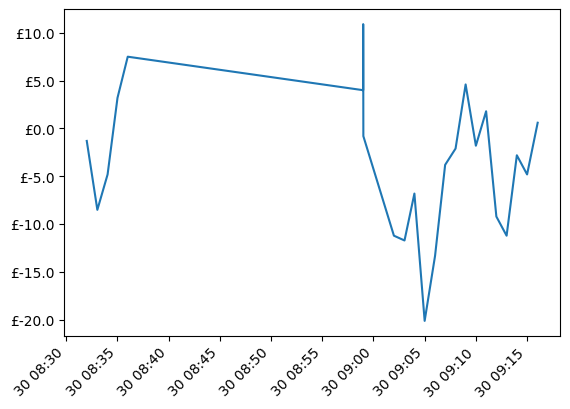

In [113]:
# Profit over time for a each model
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
def update_ticks(x, pos):
    return 1
fig,ax = plt.subplots(1,1)
# ax.plot(joined.profitAndLoss_numeric)
for v,df in joined.groupby('model_used'):
    ax.plot(df.profitAndLoss_numeric)
fig.autofmt_xdate(rotation=45)
ax.yaxis.set_major_formatter(mticker.FuncFormatter( lambda x,pos: "£"+str(x))  )

